<a href="https://colab.research.google.com/github/farfaness/dimension_reduction_and_clutering/blob/master/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data



In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [0]:
# Import data
data = np.load('/content/X_k-means.npy') 

In [0]:
data.shape

(1500, 2)

# K_means Clustering from scratch

source : https://github.com/pavankalyan1997/Machine-learning-without-any-libraries/blob/master/2.Clustering/1.K_Means_Clustering/Kmeans.py


In [0]:
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}                                          #to store cluster labels list for each point
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)  #to store centroid coordinates in n dimensions
        self.K=K                                                #nbr of clusters
        self.m=self.X.shape[0]                                  #nbr of observations
        
    def kmeanspp(self,X,K):                                     #kmeans ++ method to initiate
        i=rd.randint(0,X.shape[0])                              #Choose a random point among our dataset (index of that point)
        Centroid_temp=np.array([X[i]])                          #Store the coordinates of that point
        for k in range(1,K):                                    #Pour toutes les valeurs de k entre 1 et k, et pour chaque points, 
            D=np.array([])                                      #calculer et stocker dans D le minimum de la somme quadratique 
            for x in X:                                         #de la distance entre le point et chaque centroid (i.e. somme pour le plus proche)
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)                                    #proba : diviser chaque distance minimale par la somme totale des distances
            cummulative_prob=np.cumsum(prob)                    #compute cumulative proba
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break                                        #break when cumulative proba is better than a random number as proba
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0) #Append coordinates of the corresponding point
        return Centroid_temp.T #transpose
    
    def fit(self,n_iter):
        self.Centroids=self.kmeanspp(self.X,self.K)              #Initialize the centroids with the kmeans ++ method
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""

        for n in range(n_iter):                                  #compute euclidian distances and assign clusters
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            
            Y={}                                                 #adjust the centroids
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)  #compute the within-cluster sum of squares
        return wcss

In [0]:
X = data
m=X.shape[0] # nbr of lignes
n_iter=100   # nbr iterations with new initialisation

In [0]:
# Elbow method to find the optimum number of clusters
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

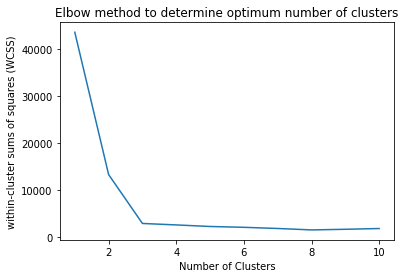

In [0]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [0]:
#based on the Elbow graph : choose 3 as optimum number of clusters
K=3

In [0]:
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

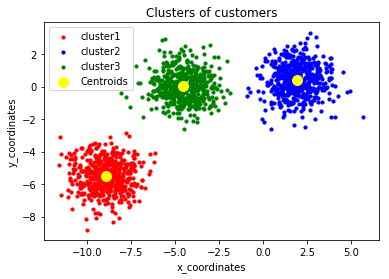

In [0]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1], s = 10, c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('x_coordinates')
plt.ylabel('y_coordinates')
plt.legend()
plt.show()

# Kmeans clustering with Sklearn librairy

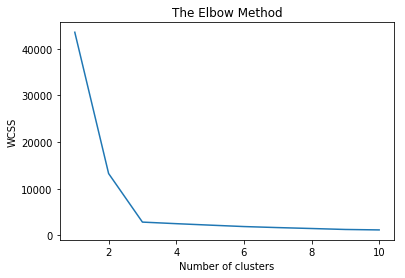

In [0]:
# Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_jobs = -1, 
                    max_iter = 300, tol = 1e-4, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [0]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, n_jobs = -1, 
                    max_iter = 300, tol =  1e-4, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

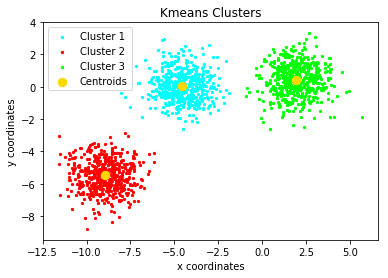

In [0]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'aqua', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'lime', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'gold', label = 'Centroids')
plt.title('Kmeans Clusters')
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
plt.legend()
plt.show()

In [0]:
z = kmeans.labels_
z.shape, np.unique(z) #label de chaque points de données, 3 clusters

((1500,), array([0, 1, 2], dtype=int32))